In [7]:
import numpy as np

from michigrad2.michigrad.visualize import show_graph
from michigrad2.michigrad.engine import Value
from michigrad2.michigrad.nn import Module, Neuron, Layer, MLP, TanH, Sigmoid, ReLU

In [8]:
np.random.seed(41)
modelo = MLP(layers=[
    Layer(2, 2),   
    Sigmoid(),        # Esta es la capa de activacion no lineal, puede ser TanH y relU tambien
])

xs = [[0,0], [0,1], [1,0], [1,1]]
ys = [0, 1, 1, 0]
yHats = [modelo(x)[0] for x in xs]


#se imprimen los valores predichos por el modelo
yHats

[Value(data=0.5, grad=0, name=),
 Value(data=0.531212961525397, grad=0, name=),
 Value(data=0.4580034601864711, grad=0, name=),
 Value(data=0.48915958165283197, grad=0, name=)]

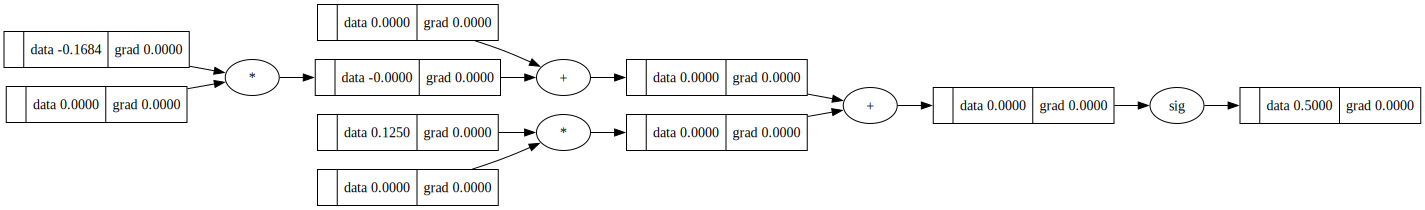

In [9]:
#muestra el grafo computacional del modelo para la primera prediccion (resultado de la etapa forward)
show_graph(yHats[0])

In [10]:
#Bucle de entrenamiento del modelo 

lr = 0.05
step = 10000
resultados = []
for _ in range(step):
    #forward pass
    yHats = [modelo(x)[0] for x in xs]

    #calculo de la perdida (loss)
    loss = sum([(y-yhat)**2 for y,yhat, in zip(ys, yHats)])/4

    #Gradientes en cero
    for p in modelo.parameters():
        p.grad = 0
    
    #backward pass
    loss.backward()

    #Se agregan los resultados de la perdida para graficar
    resultados.append(loss.data)

    #Actualizacion de los pesos
    for p in modelo.parameters():
        p.data -= p.grad * lr

loss

Value(data=0.25000000000001404, grad=1, name=)

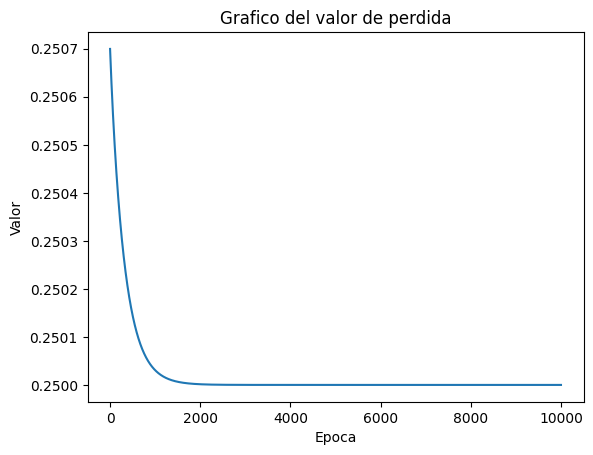

In [11]:
#funcion para graficar el valor de perdida del modelo

import matplotlib.pyplot as plt 


plt.plot(resultados)

plt.title("Grafico del valor de perdida")
plt.xlabel("Epoca")
plt.ylabel("Valor")

plt.show()


In [12]:
#Resultados finales del modelo despues del entrenamiento
xs = [[0,0],[0,1],[1,0],[1,1]]
print(modelo(xs[0])[0], modelo(xs[1])[0], modelo(xs[2])[0], modelo(xs[3])[0])


Value(data=0.5000001922049879, grad=0, name=) Value(data=0.5000000361325693, grad=0, name=) Value(data=0.5000000241928085, grad=0, name=) Value(data=0.4999998681203898, grad=0, name=)


No es posible resolver el enunciado del problema XOR unicamente utilizando una sola capa de dos neuronas + la función de activación. Si bien resolvemos el problema de una representación no lineal, la salida del modelo es bidimensional.
Para poder resolver este problema, necesitamos de esa capa de dos neuronas que ya tenemos, la función de activación y luego deberiamos de agregar una capa adicional
de salida la cual da el resultado escalar que es necesario para resolver XOR.
Con esta arquitectura que hicimos previamente no es posible entrenar al modelo ni obtener la funcion de perdida.